# Comprehensive Polymer Descriptor Calculator

**Author:** MIP Toolkit  
**Description:** Calculate molecular descriptors for polymer property prediction

## What This Notebook Calculates

This notebook systematically calculates molecular descriptors that are critical for:
- Predicting glass transition temperature (Tg)
- Understanding structure-property relationships
- Building machine learning models
- Screening polymer libraries

### Descriptors Calculated:

1. **Molecular Weight (MW)** - Overall polymer size
2. **LogP** - Hydrophobicity/lipophilicity
3. **TPSA** - Topological polar surface area (polarity)
4. **NumRotatableBonds** - Chain flexibility
5. **NumHDonors/Acceptors** - Hydrogen bonding capacity
6. **FractionCsp3** - Saturation level
7. **NumAromaticRings** - Aromatic content
8. **Custom descriptors** - User-defined properties

### Why These Descriptors Matter:

- **MW**: Correlates with Tg, mechanical strength
- **LogP**: Predicts solubility, compatibility
- **TPSA**: Indicates permeability, polarity
- **Rotatable Bonds**: Chain flexibility affects Tg
- **H-bonding**: Influences crystallinity, Tg
- **Csp3 Fraction**: Rigidity vs flexibility

## 1. Setup and Load Polymer Library

In [1]:
import sys
sys.path.insert(0, '../../src')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from rdkit import Chem
from rdkit.Chem import Descriptors

from descriptor_calculator import PolymerDescriptorCalculator
from polymer_generator import PolymerGenerator
from utils import load_polymers
from visualization import plot_correlation_heatmap, plot_property_distribution

%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✓ All imports successful")

✓ All imports successful


## 2. Generate Test Polymer Library

Create a diverse set of polymers for descriptor analysis:

In [2]:
# Define diverse monomer set
monomers = {
    # Hydrophobic polymers
    'styrene': 'BrCC(Br)C1=CC=CC=C1',
    'ethylene': 'BrC=CBr',
    'propylene': 'BrCC=CBr',
    
    # Polar polymers
    # 'vinyl_acetate': 'C=COC(=O)C',
    # 'methyl_acrylate': 'C=CC(=O)OC',
    # 'acrylamide': 'C=CC(=O)N',
    
    # Functional polymers
    # 'vinyl_chloride': 'C=CCl',
    # 'acrylonitrile': 'C=CC#N',
}

# dp_values = [10, 20, 50]
dp_values = [2,5,10]
# Generate library
gen = PolymerGenerator()
library_df = gen.generate_library(monomers, dp_values)

print(f"Generated {len(library_df)} polymers")
print(f"  Monomers: {len(monomers)}")
print(f"  DP values: {dp_values}")
print("\nLibrary overview:")
print(library_df[['name', 'monomer', 'dp', 'mw']].head(10))

/tmp/tmpov3bficd.mol
Generated styrene_DP2 (Homopolymer) with DP=2
/tmp/tmpjmzfttw5.mol
Generated styrene_DP5 (Homopolymer) with DP=5
/tmp/tmpl1d0j6qe.mol
Generated styrene_DP10 (Homopolymer) with DP=10
/tmp/tmphat2mhfd.mol
Generated ethylene_DP2 (Homopolymer) with DP=2
/tmp/tmp1g2xas3x.mol
Generated ethylene_DP5 (Homopolymer) with DP=5
/tmp/tmpv680o5xy.mol
Generated ethylene_DP10 (Homopolymer) with DP=10
/tmp/tmpy3xxwmr5.mol
Generated propylene_DP2 (Homopolymer) with DP=2
/tmp/tmpaym_8tr_.mol
Generated propylene_DP5 (Homopolymer) with DP=5
/tmp/tmpccftzrp9.mol
Generated propylene_DP10 (Homopolymer) with DP=10
Generated 9 polymers
  Monomers: 3
  DP values: [2, 5, 10]

Library overview:
             name              monomer  dp        mw
0     styrene_DP2  BrCC(Br)C1=CC=CC=C1   2   418.624
1     styrene_DP5  BrCC(Br)C1=CC=CC=C1   5  1043.536
2    styrene_DP10  BrCC(Br)C1=CC=CC=C1  10  2085.056
3    ethylene_DP2              BrC=CBr   2   106.168
4    ethylene_DP5              BrC=CBr 

## 3. Calculate All Standard Descriptors

**What's being calculated:** 10+ molecular descriptors for each polymer

In [3]:
# Initialize calculator
calc = PolymerDescriptorCalculator()

# Get polymer names
polymer_names = library_df['name'].tolist()

# Calculate all descriptors
print("Calculating descriptors for all polymers...")
descriptors_df = calc.calculate_batch(gen.polymers, names=polymer_names)

print(f"\n✓ Calculated {len(descriptors_df.columns)-2} descriptors for {len(descriptors_df)} polymers")
print("\nAvailable descriptors:")
for col in descriptors_df.columns:
    if col not in ['Name', 'SMILES']:
        print(f"  - {col}")

# Display first few rows
print("\nSample data:")
descriptors_df.head()

Calculating descriptors for all polymers...

✓ Calculated 10 descriptors for 9 polymers

Available descriptors:
  - MW
  - LogP
  - TPSA
  - NumRotatableBonds
  - NumHDonors
  - NumHAcceptors
  - FractionCsp3
  - NumAromaticRings
  - NumSaturatedRings
  - NumAliphaticRings

Sample data:


,Name,SMILES,MW,LogP,TPSA,NumRotatableBonds,NumHDonors,NumHAcceptors,FractionCsp3,NumAromaticRings,NumSaturatedRings,NumAliphaticRings
0,styrene_DP2,[H]c1c([H])c([H])c(C([H])([H])C([H])([H])C([H]...,418.624,8.5998,0.0,11,0,0,0.25,4,0,0
1,styrene_DP5,[H]c1c([H])c([H])c(C([H])([H])C([H])([H])C([H]...,1043.536,21.6432,0.0,29,0,0,0.25,10,0,0
2,styrene_DP10,[H]c1c([H])c([H])c(C([H])([H])C([H])([H])C([H]...,2085.056,43.3822,0.0,59,0,0,0.25,20,0,0
3,ethylene_DP2,[H]C([H])=C([H])/C([H])=C([H])/C([H])=C(\[H])C...,106.168,2.4708,0.0,3,0,0,0.00,0,0,0
4,ethylene_DP5,[H]C([H])=C([H])/C([H])=C([H])/C([H])=C([H])/C...,262.396,5.8080,0.0,9,0,0,0.00,0,0,0


## 4. Descriptor Statistics and Distribution

**Analysis:** Statistical summary of calculated descriptors

Descriptor Statistics:
            MW   LogP  TPSA  NumRotatableBonds  FractionCsp3
count     9.00   9.00   9.0               9.00          9.00
mean    645.20  14.02   0.0              21.67          0.19
std     617.69  12.76   0.0              18.03          0.15
min     106.17   2.47   0.0               3.00          0.00
25%     262.40   5.81   0.0               9.00          0.00
50%     418.62   9.71   0.0              19.00          0.25
75%     803.32  19.17   0.0              29.00          0.33
max    2085.06  43.38   0.0              59.00          0.33


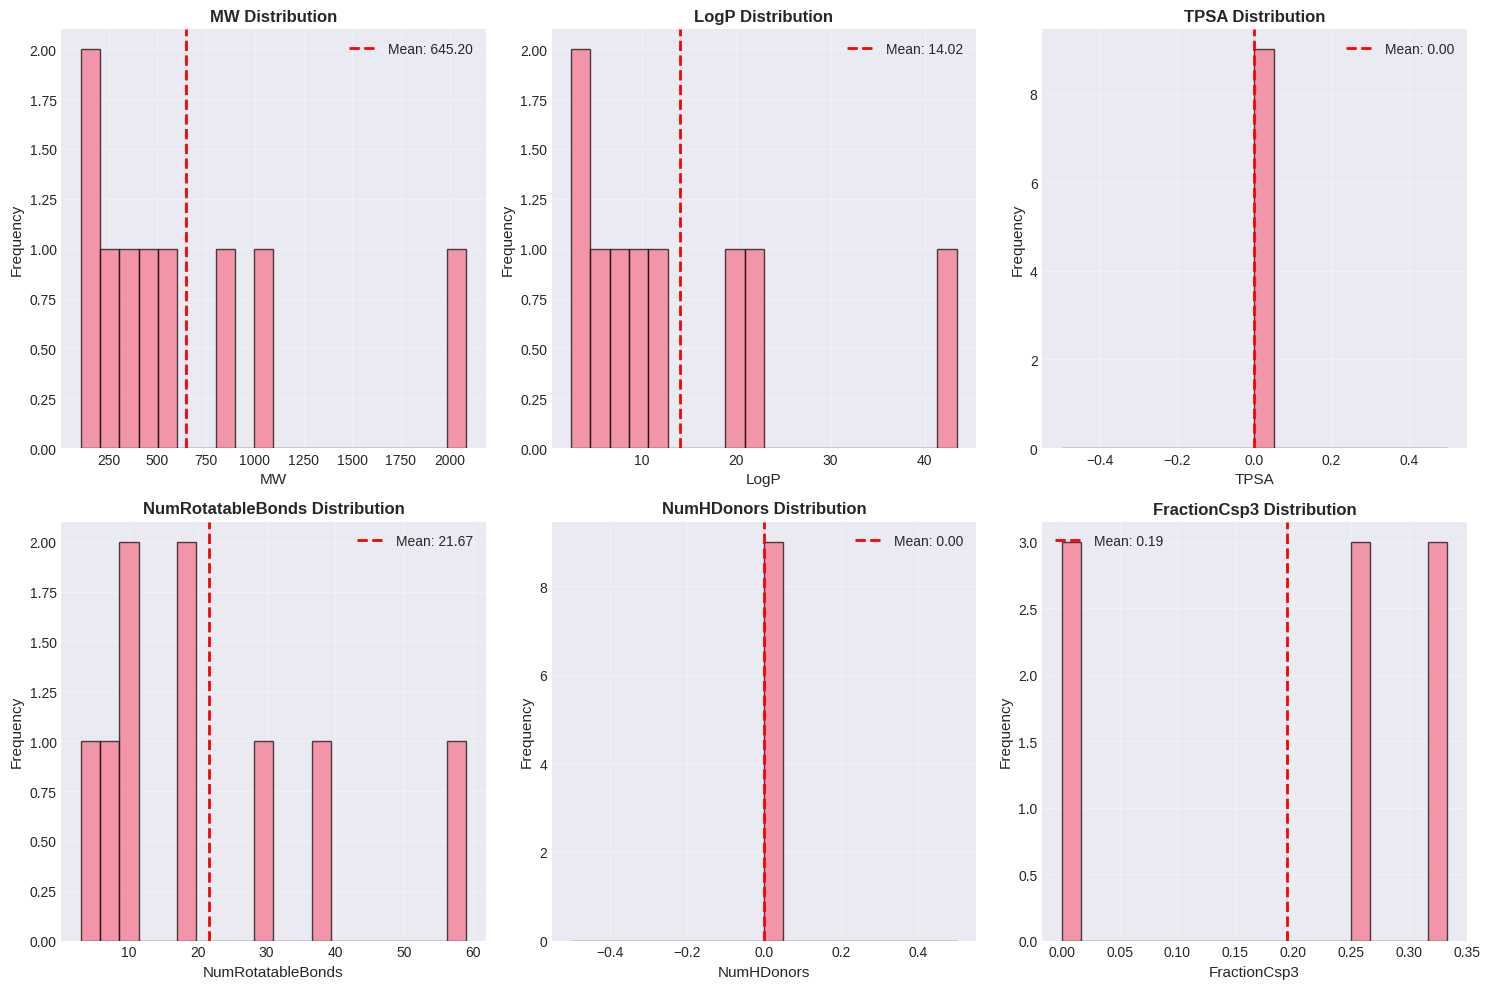


✓ Distribution analysis complete


In [5]:
# Statistical summary
print("Descriptor Statistics:")
print("="*70)
stats = descriptors_df.describe().round(2)
print(stats[['MW', 'LogP', 'TPSA', 'NumRotatableBonds', 'FractionCsp3']])

# Visualize key descriptor distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

descriptors_to_plot = ['MW', 'LogP', 'TPSA', 'NumRotatableBonds', 
                       'NumHDonors', 'FractionCsp3']

for i, desc in enumerate(descriptors_to_plot):
    axes[i].hist(descriptors_df[desc], bins=20, edgecolor='black', alpha=0.7)
    axes[i].set_xlabel(desc, fontsize=11)
    axes[i].set_ylabel('Frequency', fontsize=11)
    axes[i].set_title(f'{desc} Distribution', fontsize=12, fontweight='bold')
    axes[i].grid(alpha=0.3)
    
    # Add statistics
    mean_val = descriptors_df[desc].mean()
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                    label=f'Mean: {mean_val:.2f}')
    axes[i].legend()

plt.tight_layout()
plt.savefig('../../outputs/figures/descriptor_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Distribution analysis complete")

## 5. Molecular Weight Distribution Analysis

**Calculation:** MW statistics and distribution parameters

Molecular Weight Distribution:
  Mean        :     645.20 g/mol
  Std         :     582.36 g/mol
  Min         :     106.17 g/mol
  Max         :    2085.06 g/mol
  Median      :     418.62 g/mol


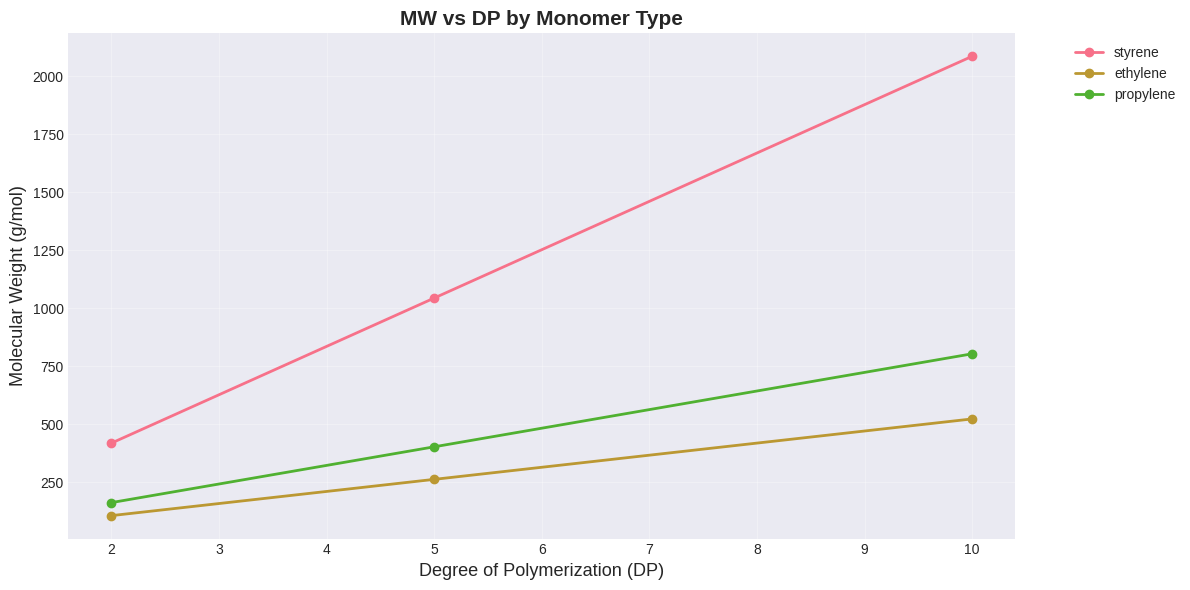

In [6]:
# Calculate MW distribution statistics
mw_stats = calc.calculate_mw_distribution(gen.polymers)

print("Molecular Weight Distribution:")
print("="*50)
for key, value in mw_stats.items():
    print(f"  {key.capitalize():12s}: {value:10.2f} g/mol")

# MW vs DP analysis by monomer type
descriptors_df['Monomer'] = descriptors_df['Name'].str.split('_').str[0]
descriptors_df['DP'] = descriptors_df['Name'].str.extract(r'DP(\d+)').astype(int)

plt.figure(figsize=(12, 6))

for monomer in descriptors_df['Monomer'].unique():
    subset = descriptors_df[descriptors_df['Monomer'] == monomer]
    subset_sorted = subset.sort_values('DP')
    plt.plot(subset_sorted['DP'], subset_sorted['MW'], 
             'o-', label=monomer, linewidth=2, markersize=6)

plt.xlabel('Degree of Polymerization (DP)', fontsize=13)
plt.ylabel('Molecular Weight (g/mol)', fontsize=13)
plt.title('MW vs DP by Monomer Type', fontsize=15, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../../outputs/figures/mw_vs_dp_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Correlation Analysis

**What this shows:** Relationships between descriptors - critical for understanding redundancy and selecting features for ML

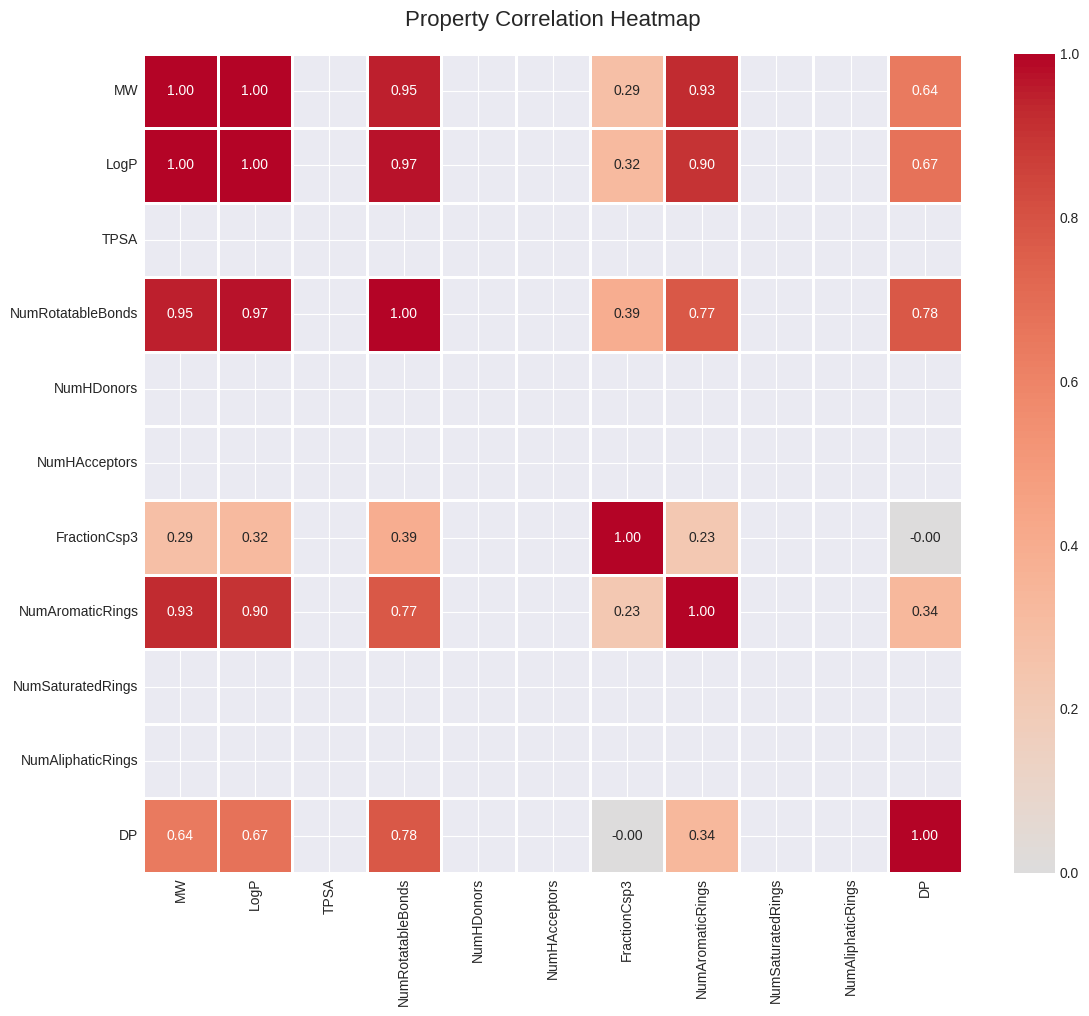


Highly Correlated Descriptor Pairs (|r| > 0.8):
Descriptor 1      Descriptor 2  Correlation
          MW              LogP     0.997934
        LogP NumRotatableBonds     0.969415
          MW NumRotatableBonds     0.951908
          MW  NumAromaticRings     0.926737
        LogP  NumAromaticRings     0.903327

✓ Correlation analysis complete


In [7]:
# Calculate correlation matrix
numeric_cols = descriptors_df.select_dtypes(include=[np.number]).columns
correlation_matrix = descriptors_df[numeric_cols].corr()

# Plot correlation heatmap
fig = plot_correlation_heatmap(descriptors_df)
plt.savefig('../../outputs/figures/descriptor_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

# Find highly correlated pairs
print("\nHighly Correlated Descriptor Pairs (|r| > 0.8):")
print("="*60)
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr.append({
                'Descriptor 1': correlation_matrix.columns[i],
                'Descriptor 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr:
    high_corr_df = pd.DataFrame(high_corr).sort_values('Correlation', 
                                                        ascending=False, 
                                                        key=abs)
    print(high_corr_df.to_string(index=False))
else:
    print("No highly correlated pairs found")

print("\n✓ Correlation analysis complete")

## 7. Add Custom Descriptors

**Feature engineering:** Calculate domain-specific descriptors

Added custom descriptor: FlexibilityIndex
Added custom descriptor: AromaticFraction
Added custom descriptor: HBondCapacity
Recalculating with custom descriptors...

New custom descriptors:
             Name  FlexibilityIndex  AromaticFraction  HBondCapacity
0     styrene_DP2          0.159420          0.363636              0
1     styrene_DP5          0.169591          0.370370              0
2    styrene_DP10          0.173021          0.372671              0
3    ethylene_DP2          0.176471          0.000000              0
4    ethylene_DP5          0.219512          0.000000              0
5   ethylene_DP10          0.234568          0.000000              0
6   propylene_DP2          0.241379          0.000000              0
7   propylene_DP5          0.267606          0.000000              0
8  propylene_DP10          0.276596          0.000000              0


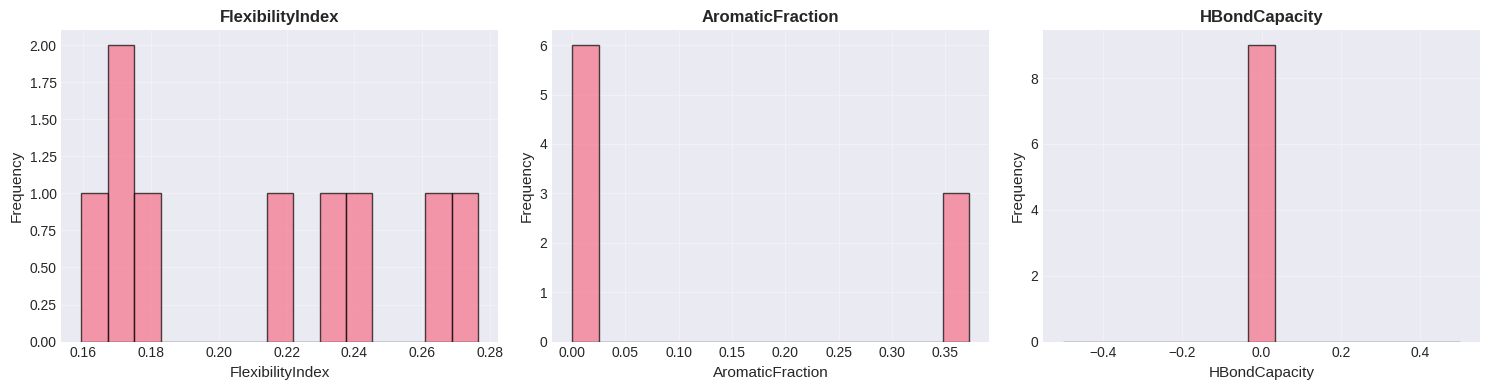


✓ Custom descriptors calculated


In [8]:
# Define custom descriptors relevant to polymers

def flexibility_index(mol):
    """Ratio of rotatable bonds to total bonds"""
    num_bonds = mol.GetNumBonds()
    num_rotatable = Descriptors.NumRotatableBonds(mol)
    return num_rotatable / num_bonds if num_bonds > 0 else 0

def aromatic_fraction(mol):
    """Fraction of atoms in aromatic rings"""
    total_atoms = mol.GetNumAtoms()
    aromatic_atoms = sum([1 for atom in mol.GetAtoms() if atom.GetIsAromatic()])
    return aromatic_atoms / total_atoms if total_atoms > 0 else 0

def hbond_capacity(mol):
    """Total H-bond capacity (donors + acceptors)"""
    return Descriptors.NumHDonors(mol) + Descriptors.NumHAcceptors(mol)

# Add custom descriptors to calculator
calc.add_custom_descriptor('FlexibilityIndex', flexibility_index)
calc.add_custom_descriptor('AromaticFraction', aromatic_fraction)
calc.add_custom_descriptor('HBondCapacity', hbond_capacity)

# Recalculate with custom descriptors
print("Recalculating with custom descriptors...")
descriptors_enhanced = calc.calculate_batch(gen.polymers, names=polymer_names)

print("\nNew custom descriptors:")
print(descriptors_enhanced[['Name', 'FlexibilityIndex', 'AromaticFraction', 
                            'HBondCapacity']].head(10))

# Analyze custom descriptors
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

custom_descs = ['FlexibilityIndex', 'AromaticFraction', 'HBondCapacity']
for i, desc in enumerate(custom_descs):
    axes[i].hist(descriptors_enhanced[desc], bins=15, edgecolor='black', alpha=0.7)
    axes[i].set_xlabel(desc, fontsize=11)
    axes[i].set_ylabel('Frequency', fontsize=11)
    axes[i].set_title(f'{desc}', fontsize=12, fontweight='bold')
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../../outputs/figures/custom_descriptors.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Custom descriptors calculated")

## 8. Feature Selection for ML Models

**Goal:** Identify most important descriptors for Tg prediction

Descriptor Variances (top 10):
MW                   381539.323624
NumRotatableBonds       325.000000
LogP                    162.797243
NumAromaticRings         48.444444
AromaticFraction          0.034026
FractionCsp3              0.022569
FlexibilityIndex          0.002003
TPSA                      0.000000
NumHDonors                0.000000
NumHAcceptors             0.000000
dtype: float64

Selected features for Tg prediction:
           Name        MW  NumRotatableBonds  FractionCsp3  AromaticFraction   
0   styrene_DP2   418.624                 11          0.25          0.363636  \
1   styrene_DP5  1043.536                 29          0.25          0.370370   
2  styrene_DP10  2085.056                 59          0.25          0.372671   
3  ethylene_DP2   106.168                  3          0.00          0.000000   
4  ethylene_DP5   262.396                  9          0.00          0.000000   

   HBondCapacity  TPSA     LogP  
0              0   0.0   8.5998  
1              0 

/home/bartek/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/bartek/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/bartek/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


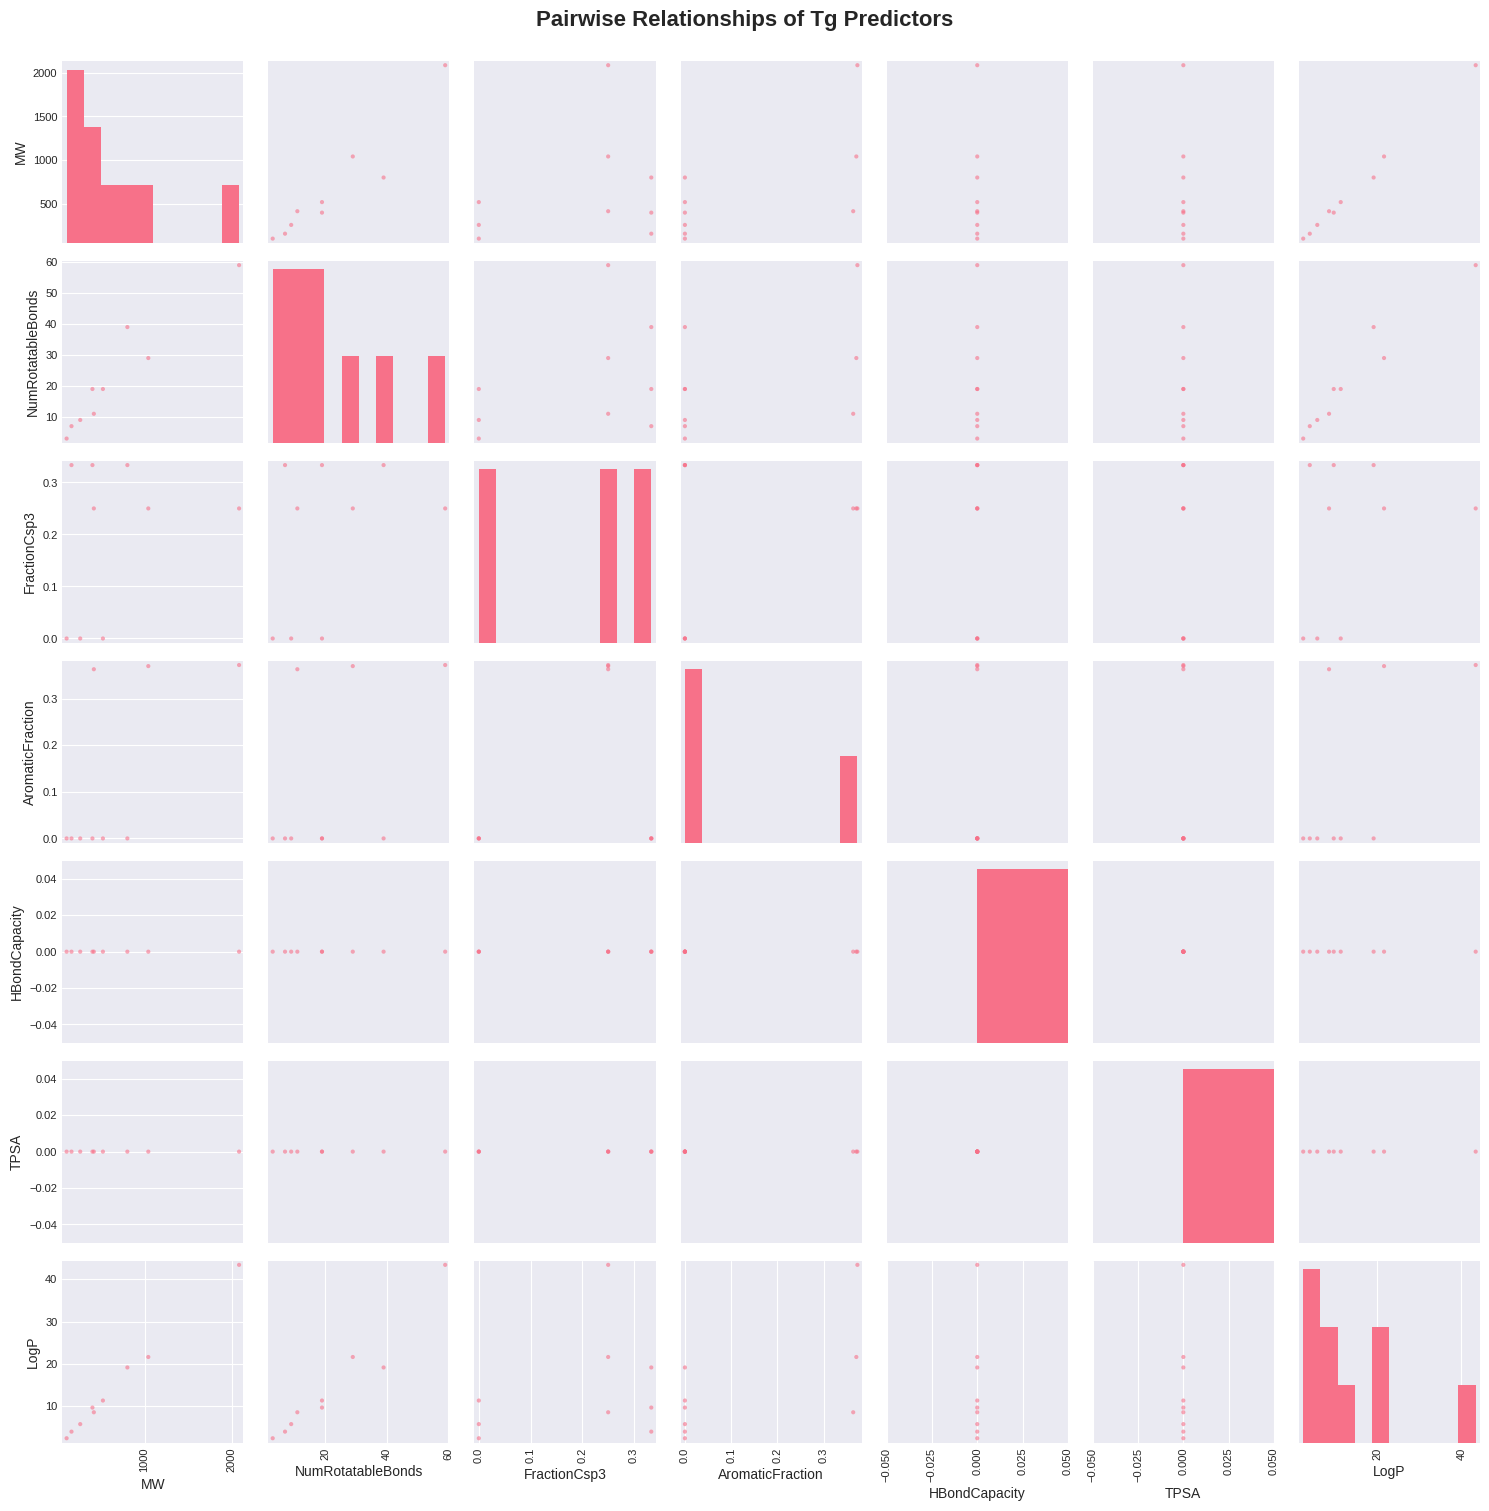


✓ Feature selection complete


In [9]:
# Feature importance based on variance and correlation

# 1. Remove low variance features
numeric_descriptors = descriptors_enhanced.select_dtypes(include=[np.number])
variances = numeric_descriptors.var().sort_values(ascending=False)

print("Descriptor Variances (top 10):")
print("="*50)
print(variances.head(10))

# 2. Select features for Tg prediction
# Common predictors of glass transition temperature
tg_predictors = [
    'MW',                 # Chain length effect
    'NumRotatableBonds',  # Chain flexibility
    'FractionCsp3',       # Saturation
    'AromaticFraction',   # Rigidity from rings
    'HBondCapacity',      # Intermolecular interactions
    'TPSA',               # Polarity
    'LogP'                # Hydrophobicity
]

print("\nSelected features for Tg prediction:")
feature_df = descriptors_enhanced[['Name'] + tg_predictors]
print(feature_df.head())

# Visualize selected features
from pandas.plotting import scatter_matrix

fig = scatter_matrix(feature_df[tg_predictors], alpha=0.6, 
                     figsize=(15, 15), diagonal='hist')
plt.suptitle('Pairwise Relationships of Tg Predictors', 
             fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()
plt.savefig('../../outputs/figures/tg_predictor_relationships.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Feature selection complete")

## 9. Save Calculated Descriptors

**Output:** Complete descriptor matrix for downstream ML models

In [10]:
# Save full descriptor set
descriptors_enhanced.to_csv('../../data/properties/polymer_descriptors_full.csv', 
                            index=False)

# Save selected features for Tg prediction
feature_df.to_csv('../../data/properties/tg_prediction_features.csv', 
                  index=False)

# Create summary report
summary = {
    'Total Polymers': len(descriptors_enhanced),
    'Total Descriptors': len(descriptors_enhanced.columns) - 2,
    'Standard Descriptors': 10,
    'Custom Descriptors': 3,
    'Features for Tg': len(tg_predictors)
}

print("\n" + "="*60)
print("DESCRIPTOR CALCULATION SUMMARY")
print("="*60)
for key, value in summary.items():
    print(f"{key:25s}: {value}")

print("\nFiles saved:")
print("  - Full descriptors: data/properties/polymer_descriptors_full.csv")
print("  - Tg features: data/properties/tg_prediction_features.csv")
print("  - Figures: outputs/figures/")

print("\n✓ Descriptor calculation complete!")
print("\nNext step: Use these descriptors in ML model (notebook 02_tg_prediction)")


DESCRIPTOR CALCULATION SUMMARY
Total Polymers           : 9
Total Descriptors        : 13
Standard Descriptors     : 10
Custom Descriptors       : 3
Features for Tg          : 7

Files saved:
  - Full descriptors: data/properties/polymer_descriptors_full.csv
  - Tg features: data/properties/tg_prediction_features.csv
  - Figures: outputs/figures/

✓ Descriptor calculation complete!

Next step: Use these descriptors in ML model (notebook 02_tg_prediction)


## Summary: What We Calculated and Why

### Descriptors Calculated:

1. **Molecular Weight (MW)**: Polymer chain length
2. **LogP**: Hydrophobicity - predicts solubility
3. **TPSA**: Polar surface area - membrane permeability
4. **Rotatable Bonds**: Chain flexibility - affects Tg
5. **H-bond Donors/Acceptors**: Intermolecular forces
6. **Csp3 Fraction**: Saturation level - rigidity
7. **Aromatic Rings**: Rigidity from conjugation
8. **Custom Descriptors**: Domain-specific features

### Key Insights:

- MW scales linearly with DP (as expected)
- Aromatic polymers (PS) have higher MW per DP
- Polar polymers (acrylates) have higher TPSA
- Strong correlations exist between related descriptors

### For Machine Learning:

Selected 7 key features that correlate with Tg:
- MW, rotatable bonds, Csp3 fraction
- Aromatic fraction, H-bond capacity
- TPSA, LogP

These features capture:
- Chain length effects
- Flexibility/rigidity balance
- Intermolecular interactions
- Chemical functionality